In [21]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import urllib.request
import json

In [22]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv")
df.head(2)

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
0,2529604,28.04.2019,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
1,2529605,29.04.2019,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [23]:
#Create a new calculated columns
df["Unit price"] = df["Total Price"]/df["QTY"]

In [24]:
#Check missing values
df.isnull().sum()

ID                         0
Date                       0
Category                   0
Invoice Number             0
Product Code               0
Customer Code              0
Destenation              110
QTY                        0
Total Price                0
Destination full name      0
Unit price                 0
dtype: int64

In [25]:
#Drop missing values
df.dropna(inplace=True)

In [58]:
#Sorted top 5 Total Price cases
df=df.sort_values(['Total Price'],ascending=False)
df.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name,Unit price
6749,2536353,31.05.2022,Category4,62,30001350,33,ROU,3500,77532.0000,Romania,22.15200
6258,2535862,18.04.2022,Category4,4,30001311,7,IRQ,1750,53322.5000,Iraq,30.47000
2615,2532219,20.02.2021,Category4,32,30001311,7,IRQ,1650,45370.4625,Iraq,27.49725
7681,2537285,07.09.2022,Category4,198,30001182,7,IRQ,2000,44666.4000,Iraq,22.33320
7565,2537169,27.08.2022,Category4,175,30001182,7,IRQ,2000,44030.0000,Iraq,22.01500


In [14]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7701 entries, 0 to 7810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7701 non-null   int64  
 1   Date            7701 non-null   object 
 2   Category        7701 non-null   object 
 3   Invoice Number  7701 non-null   int64  
 4   Product Code    7701 non-null   int64  
 5   Customer Code   7701 non-null   int64  
 6   Destenation     7701 non-null   object 
 7   QTY             7701 non-null   int64  
 8   Total Price     7701 non-null   float64
 9   Unit price      7701 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 661.8+ KB


In [52]:
#Define a size for visualisation
plt.rcParams["figure.figsize"] = (12, 8)

In [24]:
# set the style  for Seaborn visualisation
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
sns.set(rc={"lines.linewidth": 2})

<AxesSubplot:>

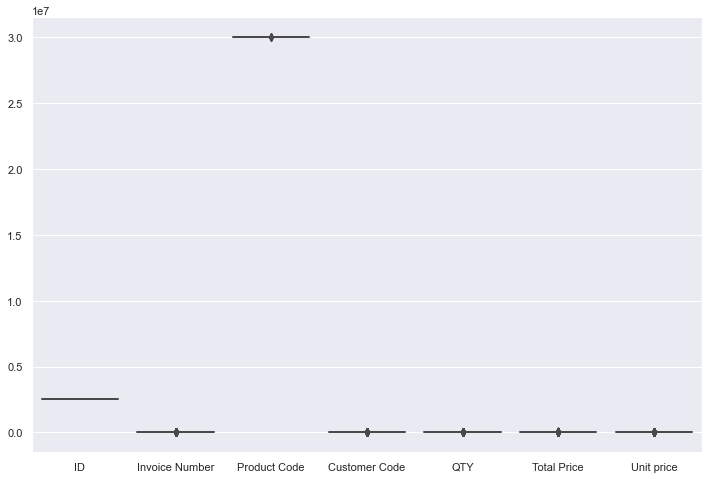

In [25]:
#Check dataset for outliers
sns.boxplot(data=df)

<AxesSubplot:xlabel='QTY', ylabel='count'>

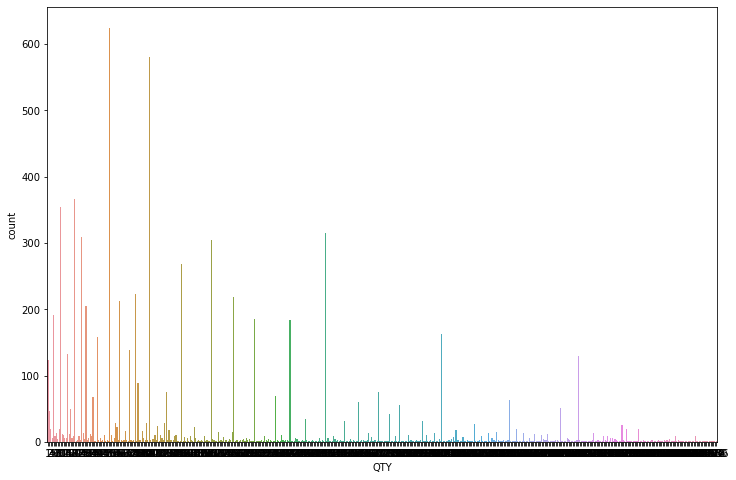

In [53]:
#Check distribution of QTY variabble
sns.countplot(x='QTY', data=df)

<AxesSubplot:>

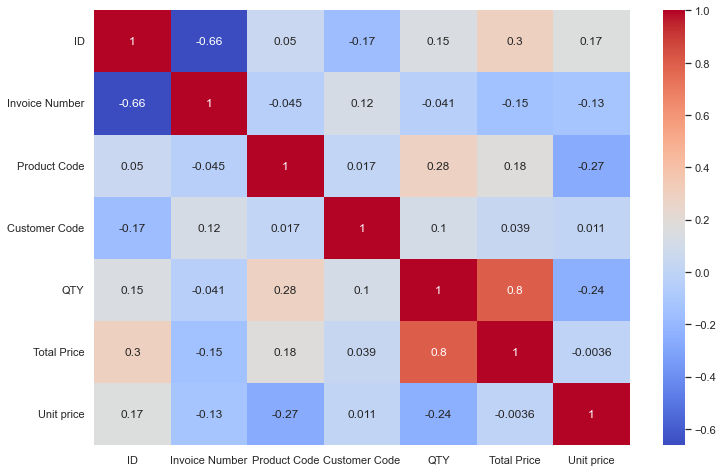

In [27]:
#Check correlection between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:ylabel='Count'>

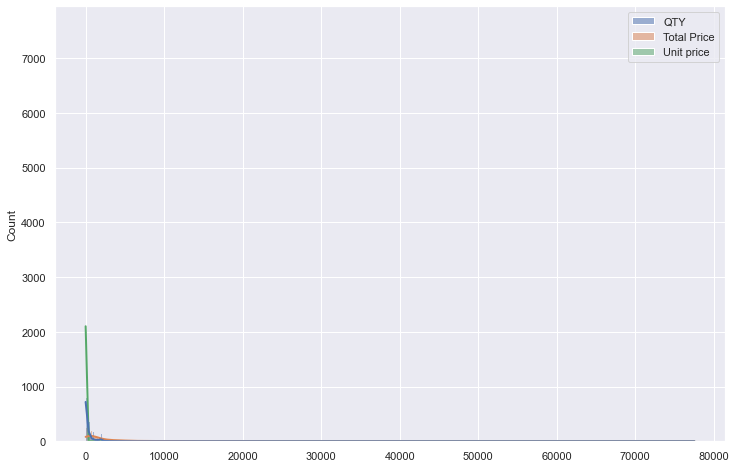

In [28]:
#Check numerical variables distribution, QTY, Total Price Unit price
sns.histplot(df[['QTY',"Total Price", "Unit price"]], kde=True)

<AxesSubplot:xlabel='QTY', ylabel='Total Price'>

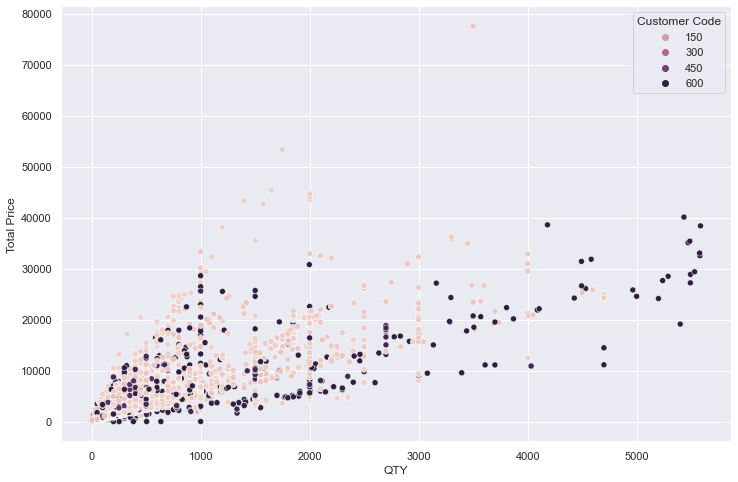

In [29]:
#Check the relationship between QTY and Total Prirce
sns.scatterplot(x='QTY', y='Total Price', data=df, hue='Customer Code')

<AxesSubplot:xlabel='Customer Code', ylabel='count'>

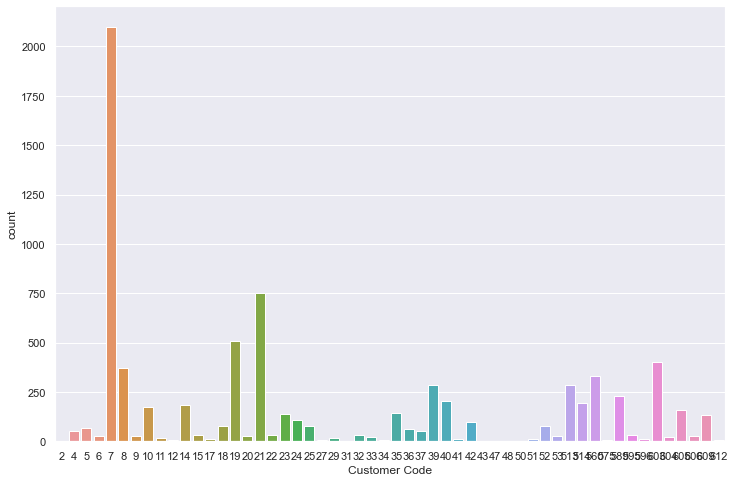

In [30]:
#Check distribution of Customer Code
sns.countplot(x='Customer Code', data=df)

<AxesSubplot:xlabel='Customer Code', ylabel='QTY'>

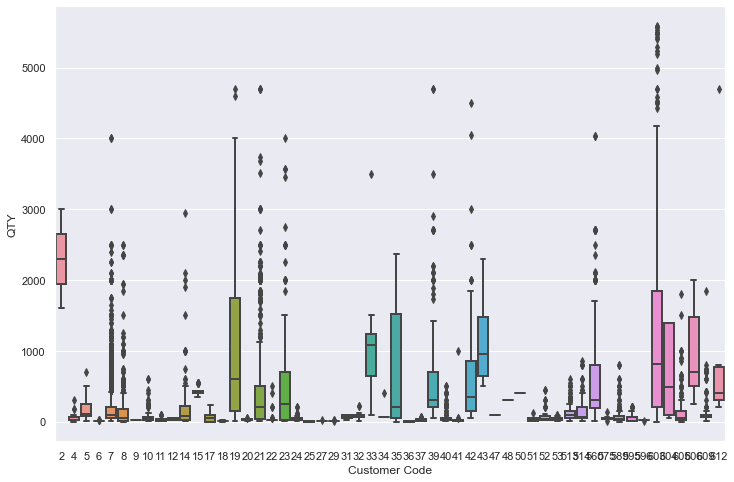

In [31]:
# Check the relationship between Customer Code and QTY
sns.boxplot(x='Customer Code', y='QTY', data=df)

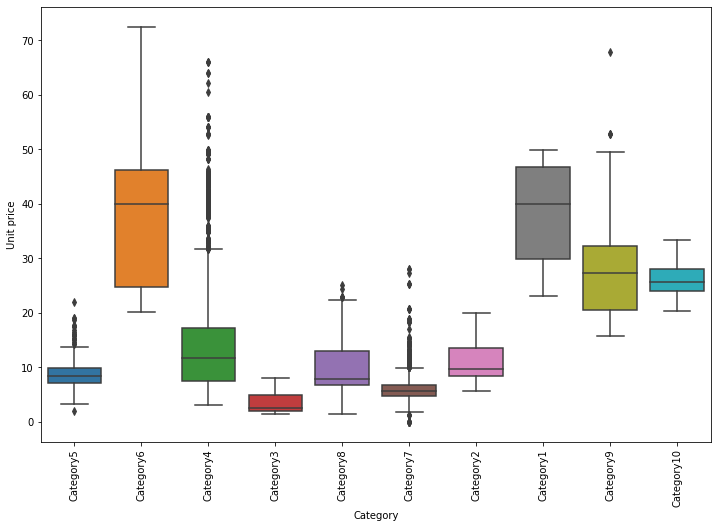

In [54]:
# Check the relationship between Category Code and Unit price
sns.boxplot(x='Category', y='Unit price', data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Customer Code', ylabel='Total Price'>

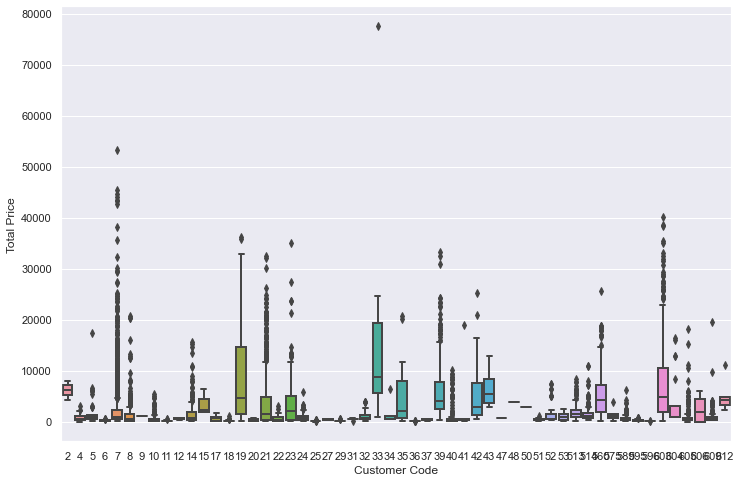

In [32]:
# Check the relationship between Customer Code and Total Price
sns.boxplot(x='Customer Code', y='Total Price', data=df)

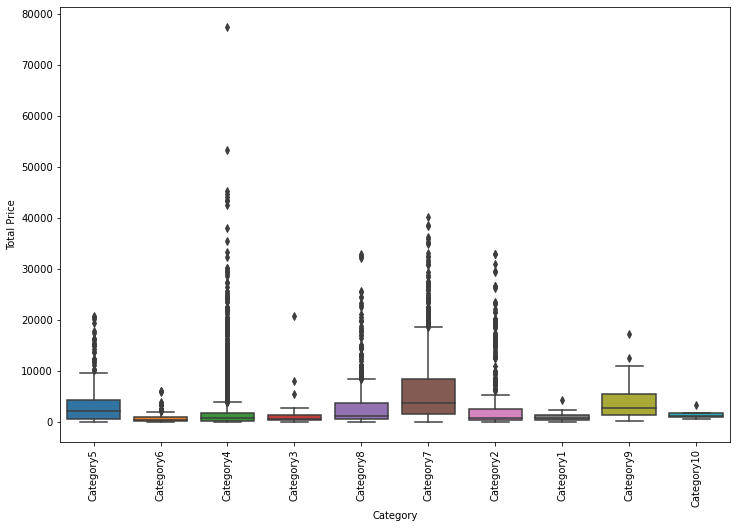

In [55]:
# Check the relationship between Category and Total Price
sns.boxplot(x='Category', y='Total Price', data=df)
plt.xticks(rotation=90)
plt.show()

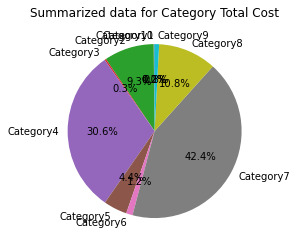

In [41]:
# Create a pie chart for Category total cost
summary = df.groupby('Category')['Total Price'].sum()
fig1, ax1 = plt.subplots()
ax1.pie(summary.values, labels=summary.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Summarized data for Category Total Cost')
plt.show()

In [16]:
# download the world.json file for map creation
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
urllib.request.urlretrieve(f'{url}/world-countries.json', 'world.json')

('world.json', <http.client.HTTPMessage at 0x1d23d077e50>)

In [27]:
# group the data by destination country and get the Total Price
grouped_data = df.groupby('Destination full name')['Total Price'].sum().reset_index()

# create a map centered on the world
m = folium.Map(location=[0, 0], zoom_start=2)

# add a choropleth layer to the map
folium.Choropleth(
    geo_data='world.json',
    name='choropleth',
    data=grouped_data,
    columns=['Destination full name', 'Total Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Cost delivery'
).add_to(m)

# add a layer control to the map
folium.LayerControl().add_to(m)

# display the map
m